# Закрепление знаний.

### ⭐ Настало время попробовать свои силы в настоящей Data Science задаче с [Kaggle](https://www.kaggle.com/mathchi/churn-for-bank-customers)

### Файл с исходными данными вы можете скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/churn.zip)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Столбцы таблицы:

- 1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- 2. CustomerId — идентификатор клиента (кат)
- 3. Surname — фамилия клиента
- 4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их) (числ)
- 5. Geography — страна клиента (банк международный) (кат)
- 6. Gender — пол клиента (кат)
- 7. Age — возраст клиента (числ)
- 8. Tenure — сколько лет клиент пользуется услугами банка (числ)
- 9. Balance — баланс на счетах клиента в банке (числ)
- 10. NumOfProducts — количество услуг банка, которые приобрёл клиент (числ)
- 11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет) (кат)
- 12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет) (кат)
- 13. EstimatedSalary — предполагаемая заработная плата клиента (числ)
- 14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент) (кат)

In [3]:
churn_df.drop(axis=1, labels='RowNumber', inplace=True)
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

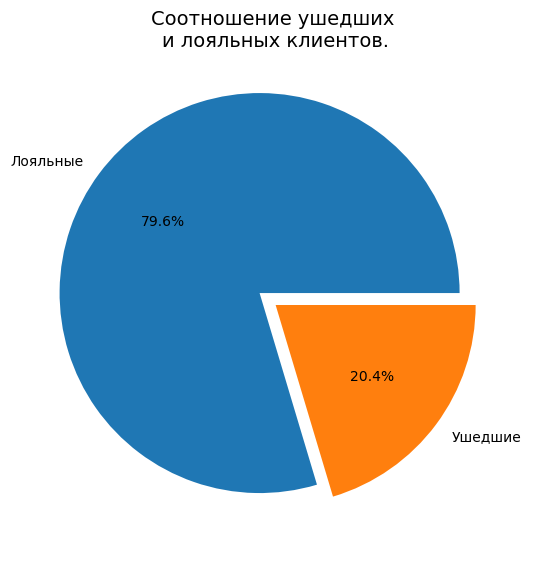

In [12]:
exited_ratio = churn_df['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_ratio,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)

axes.set_title('Cоотношение ушедших \nи лояльных клиентов.', fontsize=14);

### Ушедших клиентов чуть более 20%, что в 4 раза меньше тех кто остался. Массового оттока нет, что несомненно радует.
-----

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [19]:
hist_data = churn_df[churn_df['Balance'] > 2500]

fig = px.histogram(
    data_frame = hist_data,
    x = 'Balance',
    height=400,
    width=800,
    title='Распределение баланса на счетах в банке (больше $2500)',
)
fig.show()